[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jkitchin/s26-06642/blob/main/dsmles/assignments/hw05-dimensionality-reduction.ipynb)

# Homework 5: Dimensionality Reduction

Apply PCA and t-SNE to chemical engineering data.

In [ ]:
! curl -LsSf https://astral.sh/uv/install.sh | sh && \
  uv pip install -q --system "s26-06642 @ git+https://github.com/jkitchin/s26-06642.git"
from pycse.colab import pdf

downloading uv 0.9.28 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Problem 1: PCA Basics

Analyze spectroscopic data from polymer samples.

Data shape: (100, 50)


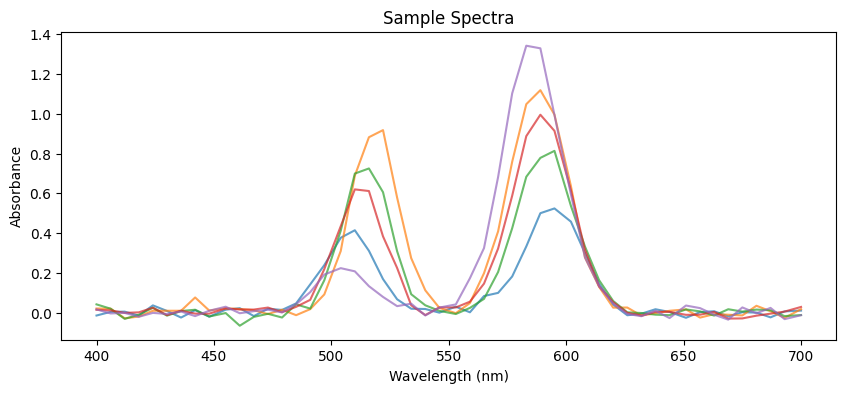

In [ ]:
# Load spectroscopic data from URL
url = "https://raw.githubusercontent.com/jkitchin/s26-06642/main/dsmles/data/hw05_spectroscopic_data.csv"
spectra_df = pd.read_csv(url)


# Extract spectra and metadata
wavelength_cols = [col for col in spectra_df.columns if col.startswith('wl_')]
spectra = spectra_df[wavelength_cols].values
concentration = spectra_df['concentration'].values
temperature = spectra_df['temperature'].values
wavelengths = np.array([int(col.split('_')[1]) for col in wavelength_cols])

print(f"Data shape: {spectra.shape}")
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.plot(wavelengths, spectra[i], alpha=0.7)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Sample Spectra')
plt.show()

**1a.** Scale the spectral data and perform PCA. How many components explain 95% of the variance?

In [ ]:
# Your code here
scaler=StandardScaler()
spectra_scaled=scaler.fit_transform(spectra)
pca=PCA()
pca.fit(spectra_scaled)

print("Explained variance ratio per component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {var:.3f} ({var*100:.1f}%)")

explained_data=0
for i in range(len(pca.explained_variance_ratio_)):
  explained_data+=pca.explained_variance_ratio_[i]
  if explained_data>=0.95:
    print(f"\nNumber of components to explain 95% of variance: {i+1}")
    break

Explained variance ratio per component:
  PC1: 0.178 (17.8%)
  PC2: 0.139 (13.9%)
  PC3: 0.052 (5.2%)
  PC4: 0.042 (4.2%)
  PC5: 0.040 (4.0%)
  PC6: 0.035 (3.5%)
  PC7: 0.034 (3.4%)
  PC8: 0.032 (3.2%)
  PC9: 0.031 (3.1%)
  PC10: 0.029 (2.9%)
  PC11: 0.027 (2.7%)
  PC12: 0.025 (2.5%)
  PC13: 0.024 (2.4%)
  PC14: 0.023 (2.3%)
  PC15: 0.022 (2.2%)
  PC16: 0.021 (2.1%)
  PC17: 0.021 (2.1%)
  PC18: 0.019 (1.9%)
  PC19: 0.018 (1.8%)
  PC20: 0.018 (1.8%)
  PC21: 0.017 (1.7%)
  PC22: 0.015 (1.5%)
  PC23: 0.015 (1.5%)
  PC24: 0.014 (1.4%)
  PC25: 0.013 (1.3%)
  PC26: 0.011 (1.1%)
  PC27: 0.011 (1.1%)
  PC28: 0.009 (0.9%)
  PC29: 0.009 (0.9%)
  PC30: 0.008 (0.8%)
  PC31: 0.007 (0.7%)
  PC32: 0.007 (0.7%)
  PC33: 0.006 (0.6%)
  PC34: 0.005 (0.5%)
  PC35: 0.005 (0.5%)
  PC36: 0.004 (0.4%)
  PC37: 0.004 (0.4%)
  PC38: 0.003 (0.3%)
  PC39: 0.003 (0.3%)
  PC40: 0.002 (0.2%)
  PC41: 0.001 (0.1%)
  PC42: 0.001 (0.1%)
  PC43: 0.000 (0.0%)
  PC44: 0.000 (0.0%)
  PC45: 0.000 (0.0%)
  PC46: 0.000 (0.0%)
 

**1b.** Plot the cumulative explained variance ratio. Create a scree plot.

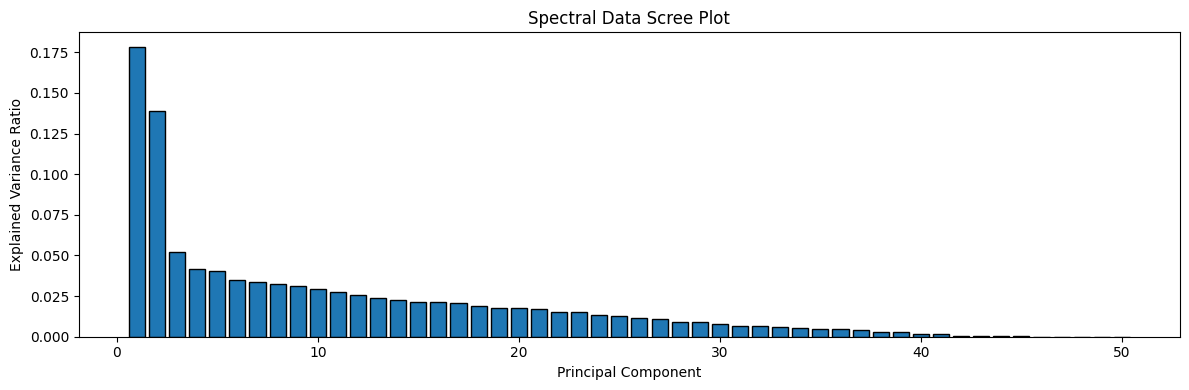

In [ ]:
fig, axe = plt.subplots(1, 1, figsize=(12, 4))

axe.bar(range(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_, edgecolor='black')
axe.set_xlabel('Principal Component')
axe.set_ylabel('Explained Variance Ratio')
axe.set_title('Spectral Data Scree Plot')

plt.tight_layout()
plt.show()


**1c.** Plot the first two principal component loadings. What wavelength regions are most important for each component?

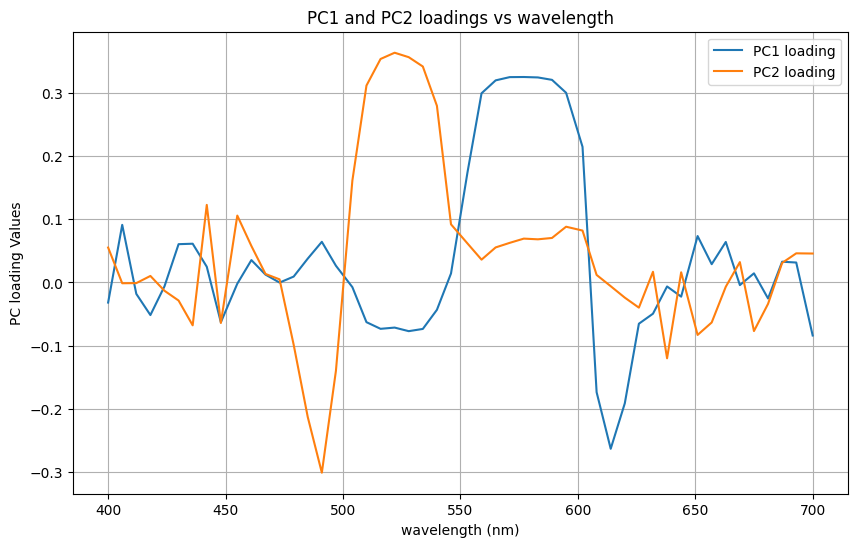

In [ ]:
# Your code here
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, pca.components_[0], label='PC1 loading')
plt.plot(wavelengths, pca.components_[1], label='PC2 loading')
plt.xlabel('wavelength (nm)')
plt.ylabel('PC loading Values')
plt.title('PC1 and PC2 loadings vs wavelength')
plt.legend()
plt.grid(True)
plt.show()

For PC1, the wavelength between 550 - 600nm is most important.
For PC2, the wavelength between 500 - 550nm is most important.

**1d.** Create a scatter plot of PC1 vs PC2, colored by concentration. Is there a relationship?

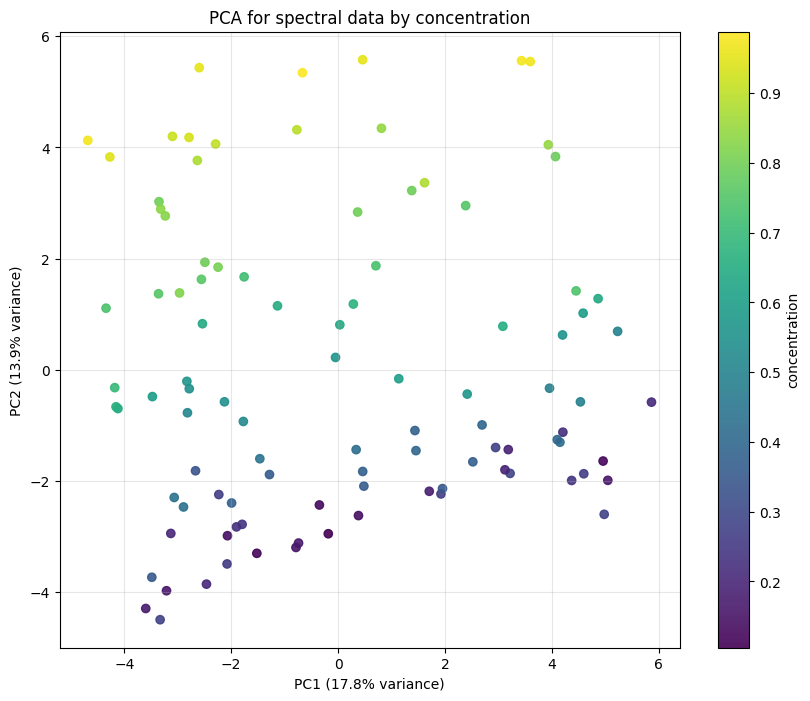

In [ ]:
spectra_pca = pca.transform(spectra_scaled)

# I used AI to tell me whether I can put list data into the color parameter when plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(spectra_pca[:, 0], spectra_pca[:, 1],
                      c=concentration,alpha=0.9)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA for spectral data by concentration')

# I used AI to add a color bar to explain concentration mapping
plt.colorbar(scatter, label='concentration')
plt.grid(True, alpha=0.3)
plt.show()

## Problem 2: t-SNE Visualization

Visualize clusters in high-dimensional data.

In [ ]:
# Load catalyst properties data from URL
url = "https://raw.githubusercontent.com/jkitchin/s26-06642/main/dsmles/data/hw05_catalyst_properties.csv"
catalyst_df = pd.read_csv(url)
# Extract property columns and labels
# I modified this code such that we selected columns except the catalst_type
# which is what we are looking for here
property_cols = [col for col in catalyst_df.columns if col!="catalyst_type"]
catalyst_properties = catalyst_df[property_cols].values
catalyst_labels = catalyst_df['catalyst_type'].unique().tolist()
print(catalyst_labels)
print(f"Data shape: {catalyst_properties.shape}")

['Type_A', 'Type_B', 'Type_C']
Data shape: (150, 10)


**2a.** Apply t-SNE with perplexity=30. Plot the results colored by catalyst type.

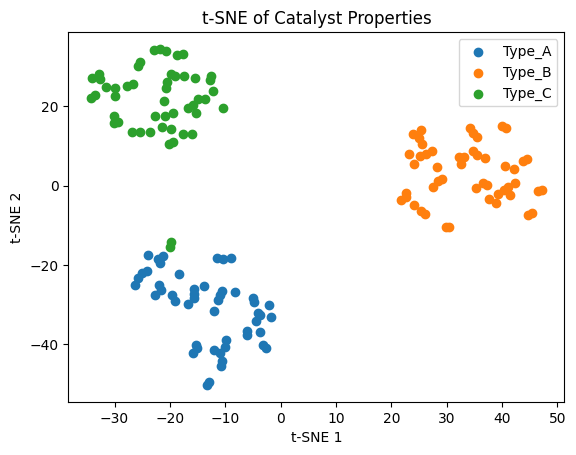

In [ ]:
# Your code here
scaler_catalyst=StandardScaler()
catalyst_scaled=scaler_catalyst.fit_transform(catalyst_properties)

tsne=TSNE(n_components=2, perplexity=5,random_state=42)
catalyst_tsne=tsne.fit_transform(catalyst_scaled)

for cat in catalyst_labels:
  mask=catalyst_df['catalyst_type']==cat
  plt.scatter(catalyst_tsne[mask,0],catalyst_tsne[mask,1],label=cat)

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Catalyst Properties')
plt.legend()
plt.show()

**2b.** How does perplexity affect the result? Compare perplexity=5, 30, and 50.

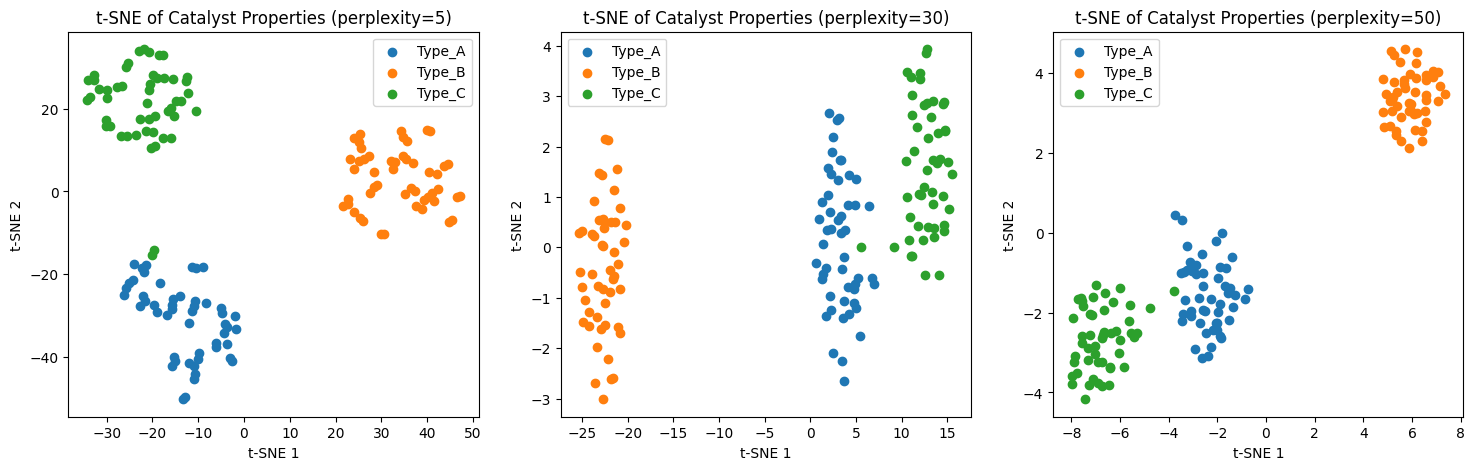

In [ ]:
# Your code here
scaler_catalyst=StandardScaler()
catalyst_scaled=scaler_catalyst.fit_transform(catalyst_properties)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Perplexity = 5
tsne=TSNE(n_components=2, perplexity=5,random_state=42)
catalyst_tsne=tsne.fit_transform(catalyst_scaled)
for cat in catalyst_labels:
  mask=catalyst_df['catalyst_type']==cat
  axes[0].scatter(catalyst_tsne[mask,0],catalyst_tsne[mask,1],label=cat)

axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')
axes[0].set_title('t-SNE of Catalyst Properties (perplexity=5)')
axes[0].legend()

# Perplexity = 30
tsne=TSNE(n_components=2, perplexity=30,random_state=42)
catalyst_tsne=tsne.fit_transform(catalyst_scaled)
for cat in catalyst_labels:
  mask=catalyst_df['catalyst_type']==cat
  axes[1].scatter(catalyst_tsne[mask,0],catalyst_tsne[mask,1],label=cat)

axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('t-SNE of Catalyst Properties (perplexity=30)')
axes[1].legend()

# Perplexity = 50
tsne=TSNE(n_components=2, perplexity=50,random_state=42)
catalyst_tsne=tsne.fit_transform(catalyst_scaled)
for cat in catalyst_labels:
  mask=catalyst_df['catalyst_type']==cat
  axes[2].scatter(catalyst_tsne[mask,0],catalyst_tsne[mask,1],label=cat)

axes[2].set_xlabel('t-SNE 1')
axes[2].set_ylabel('t-SNE 2')
axes[2].set_title('t-SNE of Catalyst Properties (perplexity=50)')
axes[2].legend()

When perplexity is lower (5 and 30), tsne focuses on the local relationship within clusters. It tries to preserve the distance between very small neighbours, which leads to more larger clusters. When perplexity is high, tsne weighs more neighbours for each point, considering the global structure more, which results in preservation in both the overall layout of the clusters as well as the structure distances within the clusters.

**2c.** Compare t-SNE to PCA for this dataset. Which method better separates the catalyst types?

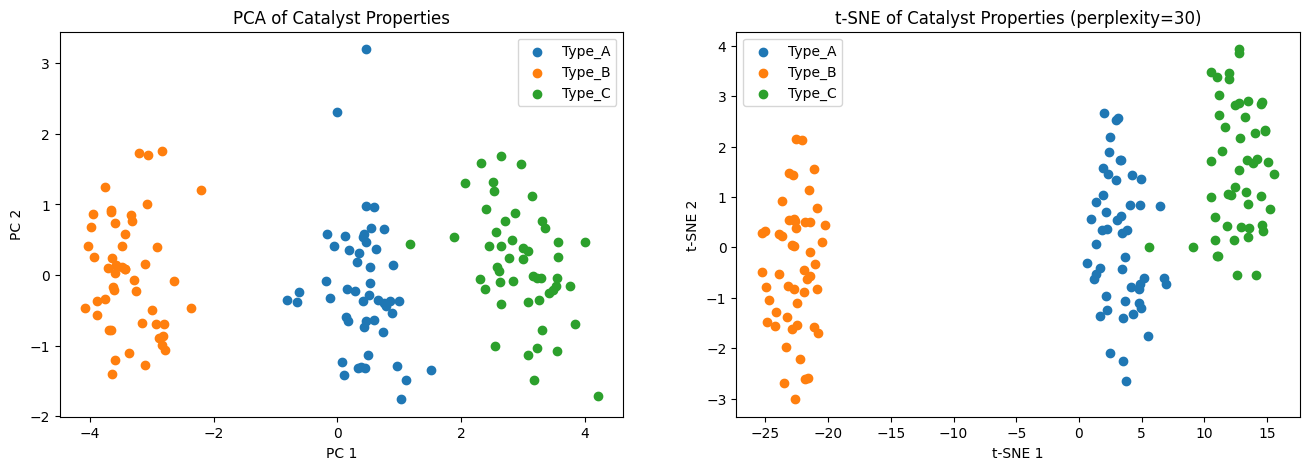

In [ ]:
# Your code here
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

pca=PCA()
catalyst_pca=pca.fit_transform(catalyst_scaled)
for cat in catalyst_labels:
  mask=catalyst_df['catalyst_type']==cat
  axes[0].scatter(catalyst_pca[mask,0],catalyst_pca[mask,1],label=cat)

axes[0].set_xlabel('PC 1')
axes[0].set_ylabel('PC 2')
axes[0].set_title('PCA of Catalyst Properties')
axes[0].legend()

tsne=TSNE(n_components=2, perplexity=30,random_state=42)
catalyst_tsne=tsne.fit_transform(catalyst_scaled)
for cat in catalyst_labels:
  mask=catalyst_df['catalyst_type']==cat
  axes[1].scatter(catalyst_tsne[mask,0],catalyst_tsne[mask,1],label=cat)

axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('t-SNE of Catalyst Properties (perplexity=30)')
axes[1].legend()

t-SNE better separates the data. PCA shows apparent overlap between Type A and Type C. This aligns with the fact that PCA captures the global structure but ignores discrimnation between groups. t-SNE in this case has minimal overal between types and produces condensed and clearly seprated clusters. This implies that the data exhibits a nonlinear local property that's better captured by t-SNE.

## Problem 3: Interpretation

**3a.** A colleague wants to use PCA to reduce 100 process variables to 10 for a predictive model. What questions should they consider before doing this?

*Your answer here:*

They should consider:
1. How much variance the first 10 principal components explain: if the variance is sufficient for the predictive task, then PCA could be a good start
2. Whether the data are properly scaled: PCA is sensitive to variable magnitude.
3. Interpretability of original variables: PCA transforms features into linear combinations that may be harder to assign an intuitive meaning.
4. They should validate whether PCA actually improves model performance through cross-validation, rather than assuming dimensionality reduction will help.



**3b.** Why can't you use t-SNE embeddings as features for a predictive model on new data?

*Your answer here:*
t-SNE embeddings are constructed based on the specific dataset used to generate them. Because t-SNE evaluates local neighbor relationships, adding new data points alters the neighborhood structure and therefore changes the entire embedding. As a result, t-SNE must be re-run whenever new data are introduced. Moreover, distances between far-apart clusters in a t-SNE embedding are not meaningful, so the resulting coordinates do not provide stable or interpretable numerical features for predictive modeling.


**3c.** You have spectral data from 1000 wavelengths and want to predict concentration. Would you use PCA, t-SNE, or neither for preprocessing? Explain.

*Your answer here:*
I would use PCA because it reduces the 1000-wavelength data into a smaller set of components while still allowing new spectra to be transformed consistently. PCS is well-suited for high dimesnional data while preserving the global strucutre. I would not use t-SNE because it is mainly for visualization and does not provide a stable way to embed new data for prediction.
